
# Semestral Work Assignment (4IZ172) – Clustering


# Imports

## Libraries

In [2]:
# pandas -> we are working with dataframes
import pandas as pd
import numpy as np

# chardet -> used for the detection of the encoding of the csv file
import chardet

# sklearn -> the library of choice for machine learning
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# scipy
import scipy.cluster.hierarchy as sch

# re -> for regular expressions to clean text
import re

# nltk -> natural language tool kit, the library we will use for NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# inflect ->
import inflect

# matplotlib and seaborn -> for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brzak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\brzak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brzak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


## Dataset
For this coursework i chose the FR aerospace dataset.

Not all datasets to choose from for this coursework are encoded the same, so let's look at this one in particular.

In [4]:
path = "data/FR-aerospace-translate.csv"
with open(path, 'rb') as f:
    rawdata = f.read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

Detected encoding: utf-8


By having a quick look at the file, we see it is a normal utf-8 csv, let's load it!

In [ ]:

# We have the encoding, now we can read the CSV file
df_aero = pd.read_csv("data/FR-aerospace-translate.csv",encoding=encoding)
df_aero

,Name,URL,FR,EN
0,ACPI SARL,https://acpi.tech,"Société d’ingénierie fondée en 1994, nous somm...","Established in 1994, we specialize in the foll..."
1,ACRI-ST,https://www.acri-st.fr/fr/,Le siege d’ACRI-ST (créée en 1989) est situé a...,ACRI-ST's head office (created in 1989) is loc...
2,AD INDUSTRIES HYDRAULICS,https://adgroupe.com/,Filiale du Groupe AD Industrie (CA 190 M - 1 5...,Subsidiary of the AD Industry Group (CA 190 M ...
3,AD-WAIBE,https://ad-waibe.fr,Savoir-faire : - Expertise Design Thinking et ...,Know how : - Design Thinking and innovation ex...
4,ADAGOS,https://adagos.com,ADAGOS a développé une nouvelle approche neuro...,To address the challenges in the implementatio...
...,...,...,...,...
600,AES,https://ae-services.fr,Spécialisée dans l’ingénierie d’équipements d’...,"AES, specialized in the engineering of automat..."
601,AGUILA TECHNOLOGIES,https://aguila.fr/,AGUILA est un acteur clé des technologies comm...,AGUILA Technologies is an independent high-tec...
602,AGENIUM,https://agenium.group/fr,AGENIUM accompagne les grands comptes de la Dé...,AGENIUM a key partner for major accounts of De...
603,AEVA,https://aece-group.com/en/entity/aeva/,"AEVA, groupe AECE, compte 70 collaborateurs su...","AEVA, AECE Group, has 70 employees at Fléac cl..."


### Dataset statistics

In [6]:
na_count = df_aero.isna().any(axis=1).sum()
print(na_count)
print(df_aero.shape[0]-na_count)
df_aero = df_aero.dropna()

49
556


There are 49 rows containing at least 1 NA value. If we delete those, we are left with 556 full rows.


# Preprocessing
The section should contain:

Description of preprocessing steps involved
Report on the preprocessing results


In [8]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Lemmatize each token
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stem each token
    
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a string
    return " ".join(lemmatized_tokens)


df_aero['EN_preprocessed'] = df_aero['EN'].apply(preprocess)
for i in range(5):
    print(df_aero['EN_preprocessed'].iloc[i])

establish in 1994 , we special in the follow field : - industri comput : comput , databas , me and supervisor , traceabl , cloud ( azur ) , iot lpwan ( lorawan ) - test bench : aeronaut , electr equip - traceabl - process automat : product by `` batch '' , fuzzi logic control - industri organis audit : flux , obsolesc comput and autom our mechan activ can also deploy robot solut , convent or collabor . under certif en9100 and iso 9001 our partnership : - microsoft partner network , azur - custom system siemen - aveva system integr : wonderwar - specialist histori schneider - specialist histori citect scada
acri-st 's head offic ( creat in 1989 ) is locat in sophi antipoli . in franc , acri-st also ha 3 establish locat in pari , toulous and grass ( the center d'etud et de recherch grass acri-st , cerga ) . it team of engin and research is special in space remot sens ( earth and univers observ from space ) and in the manag of veri larg volum of data ( relat to the ocean , the earth and t

C:\Users\brzak\AppData\Local\Temp\ipykernel_6728\3339418970.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aero['EN_preprocessed'] = df_aero['EN'].apply(preprocess)


### TF-IDF matrix

In [9]:
df_aero = df_aero.dropna()

documents = df_aero["EN_preprocessed"].tolist()
names = df_aero["Name"].tolist()
tfidfvectorizer = TfidfVectorizer(stop_words='english')
countvectorizer = TfidfVectorizer(stop_words='english', use_idf=False, norm=None)

tfidf = tfidfvectorizer.fit_transform(raw_documents=documents)
tfidf_df = pd.DataFrame(tfidf.todense(), index=names, columns=tfidfvectorizer.get_feature_names_out())

absolute_tfidf = countvectorizer.fit_transform(raw_documents=documents)
absolute_tfidf_df = pd.DataFrame(absolute_tfidf.todense(), index=names, columns=countvectorizer.get_feature_names_out())

similarity_matrix = cosine_similarity(tfidf)
tfidf_df # type: ignore

,000,002,0191,02,025,09,10,100,1000,1000m2,...,young,zealand,zeiss,zephalto,zero,zigbe,zinc,zodiac,zone,école
ACPI SARL,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACRI-ST,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AD INDUSTRIES HYDRAULICS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AD-WAIBE,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAGOS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AES,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGUILA TECHNOLOGIES,0.145264,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGENIUM,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AEVA,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.117982,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

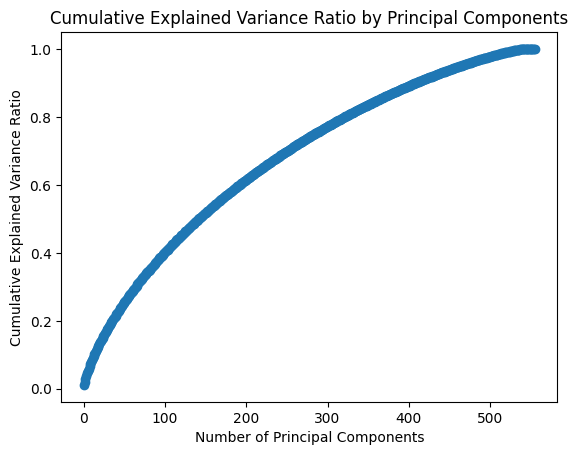

In [10]:
pca_tuning = PCA()
X_pca_tuning = pca_tuning.fit_transform(tfidf_df)

explained_variance = pca_tuning.explained_variance_
total_explained_variance = explained_variance.sum()

explained_variance_ratio = pca_tuning.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()


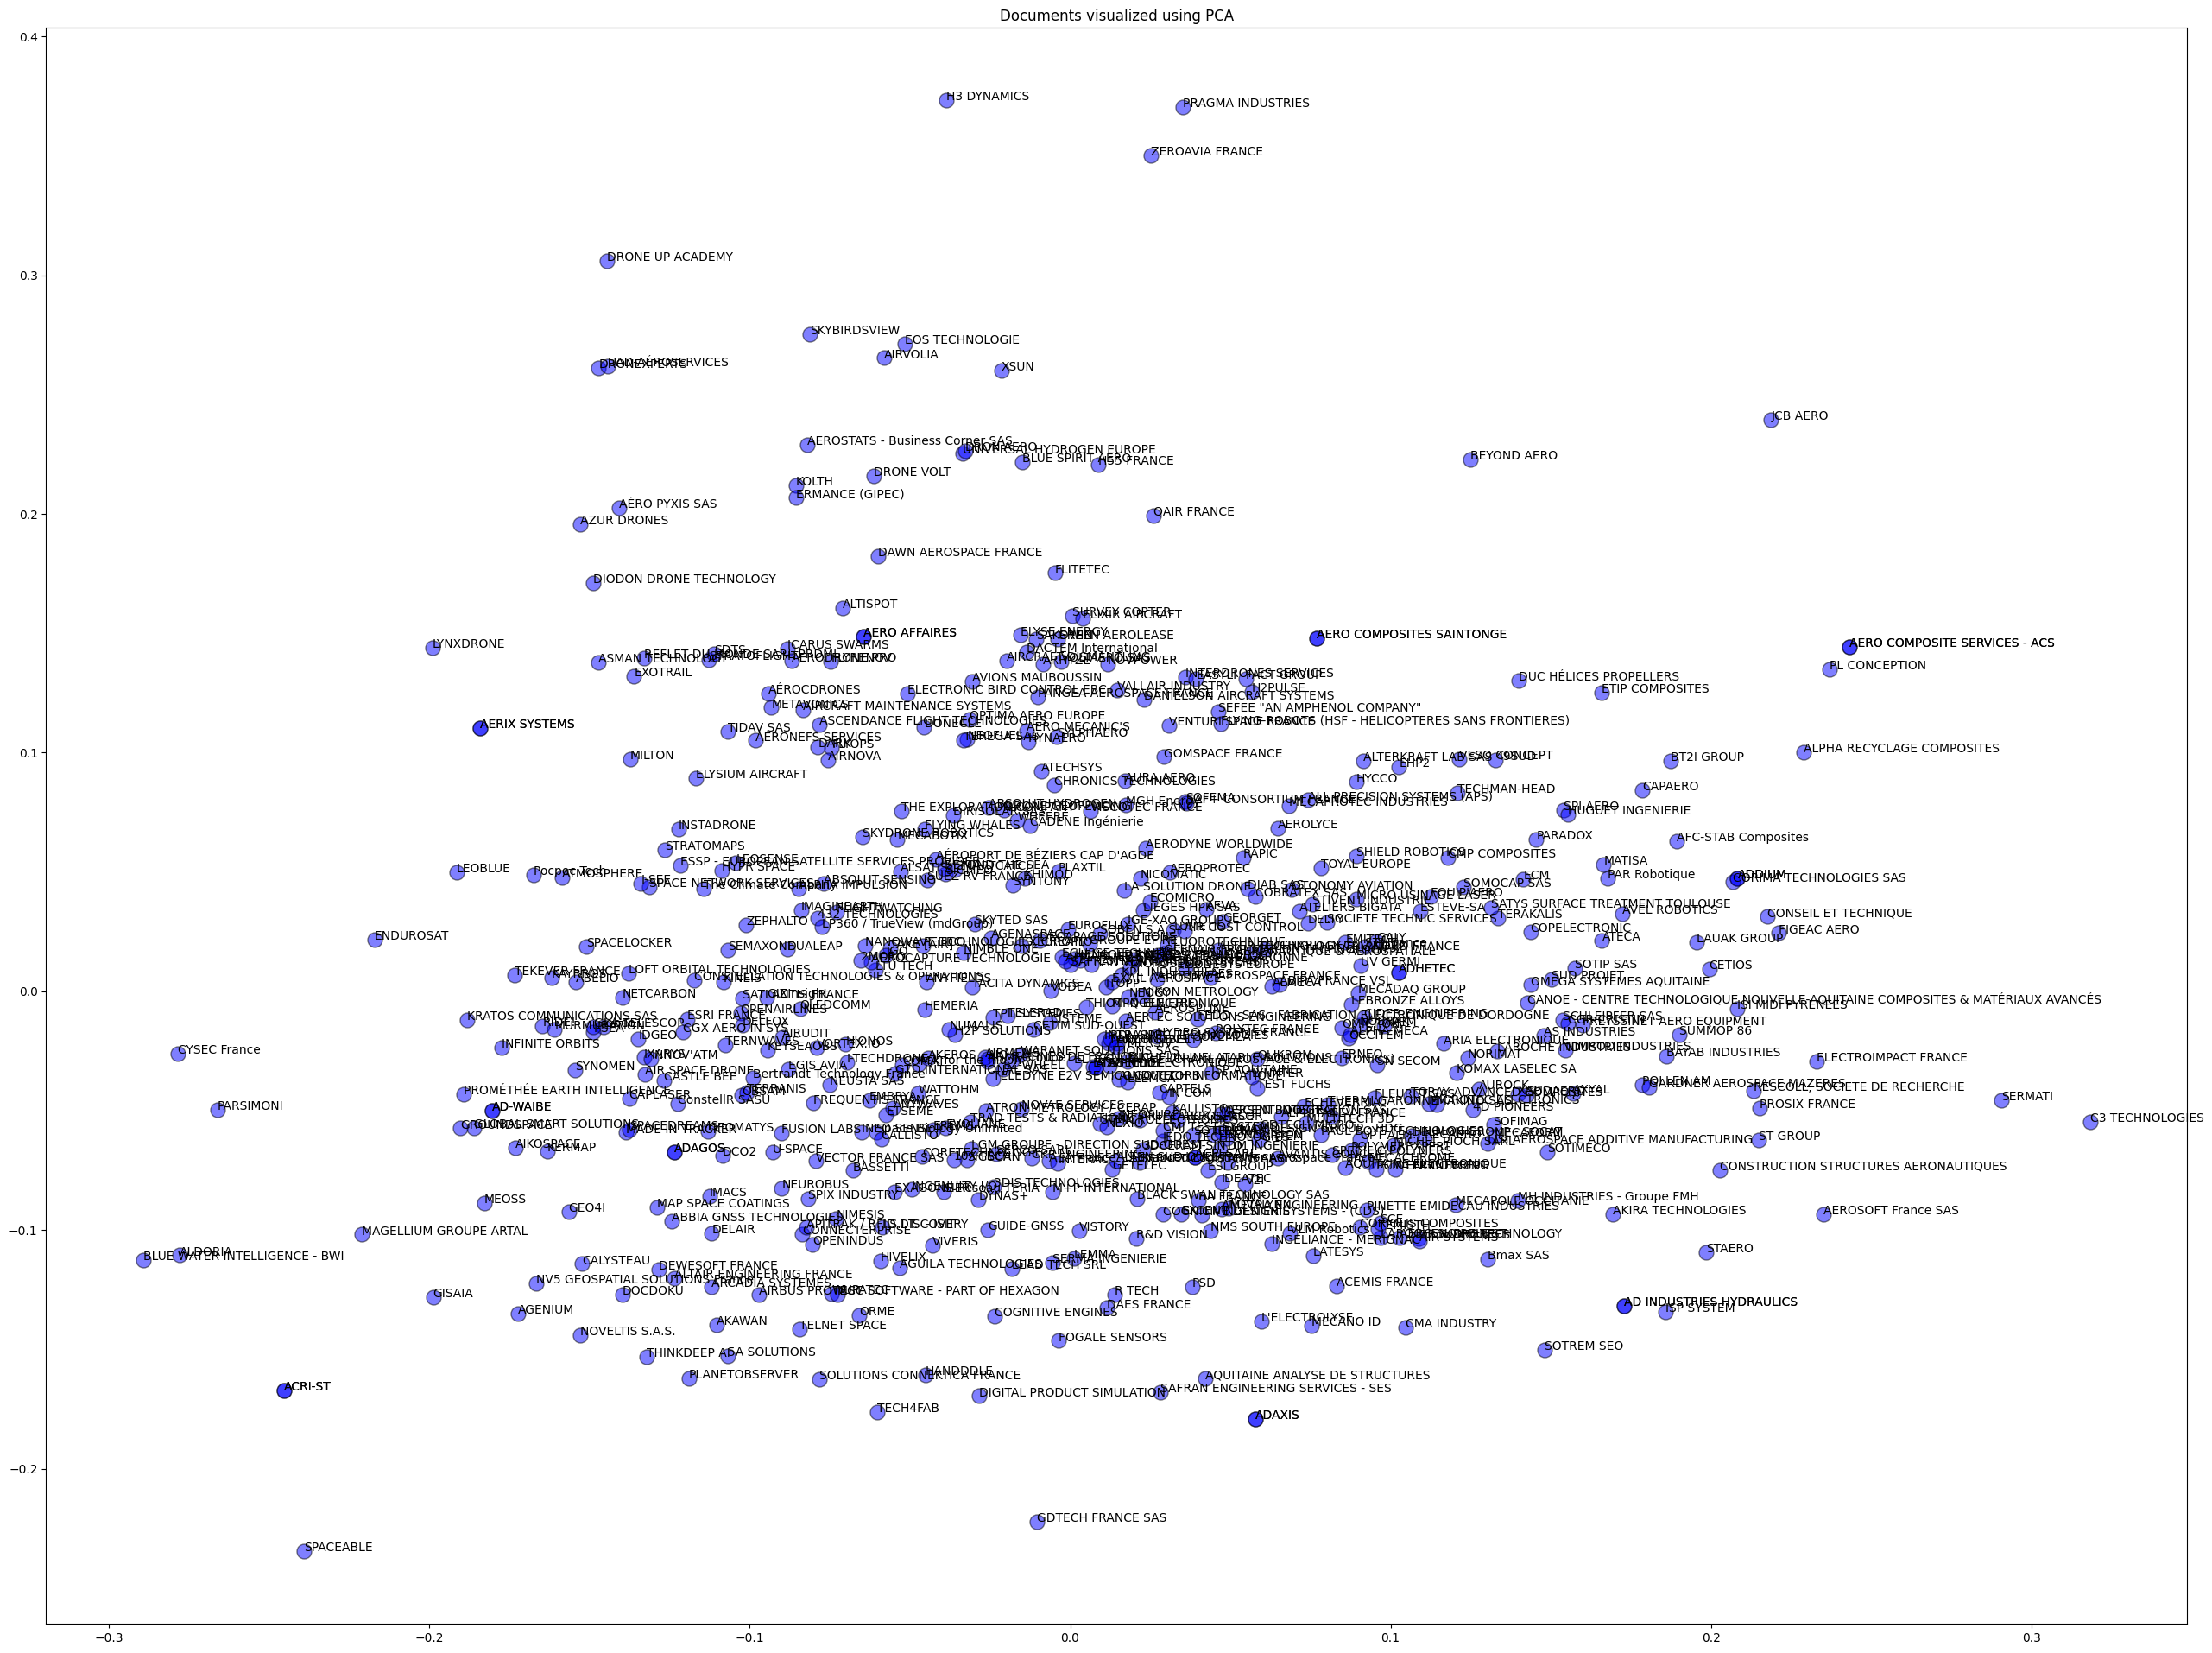

In [11]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_df)

plt.figure(figsize=(32, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolors='k', s=150, alpha=0.5)
for i, filename in enumerate(names):
    plt.annotate(filename, (reduced_data[i, 0], reduced_data[i, 1]))
plt.title("Documents visualized using PCA")
plt.show()

### t-SNE

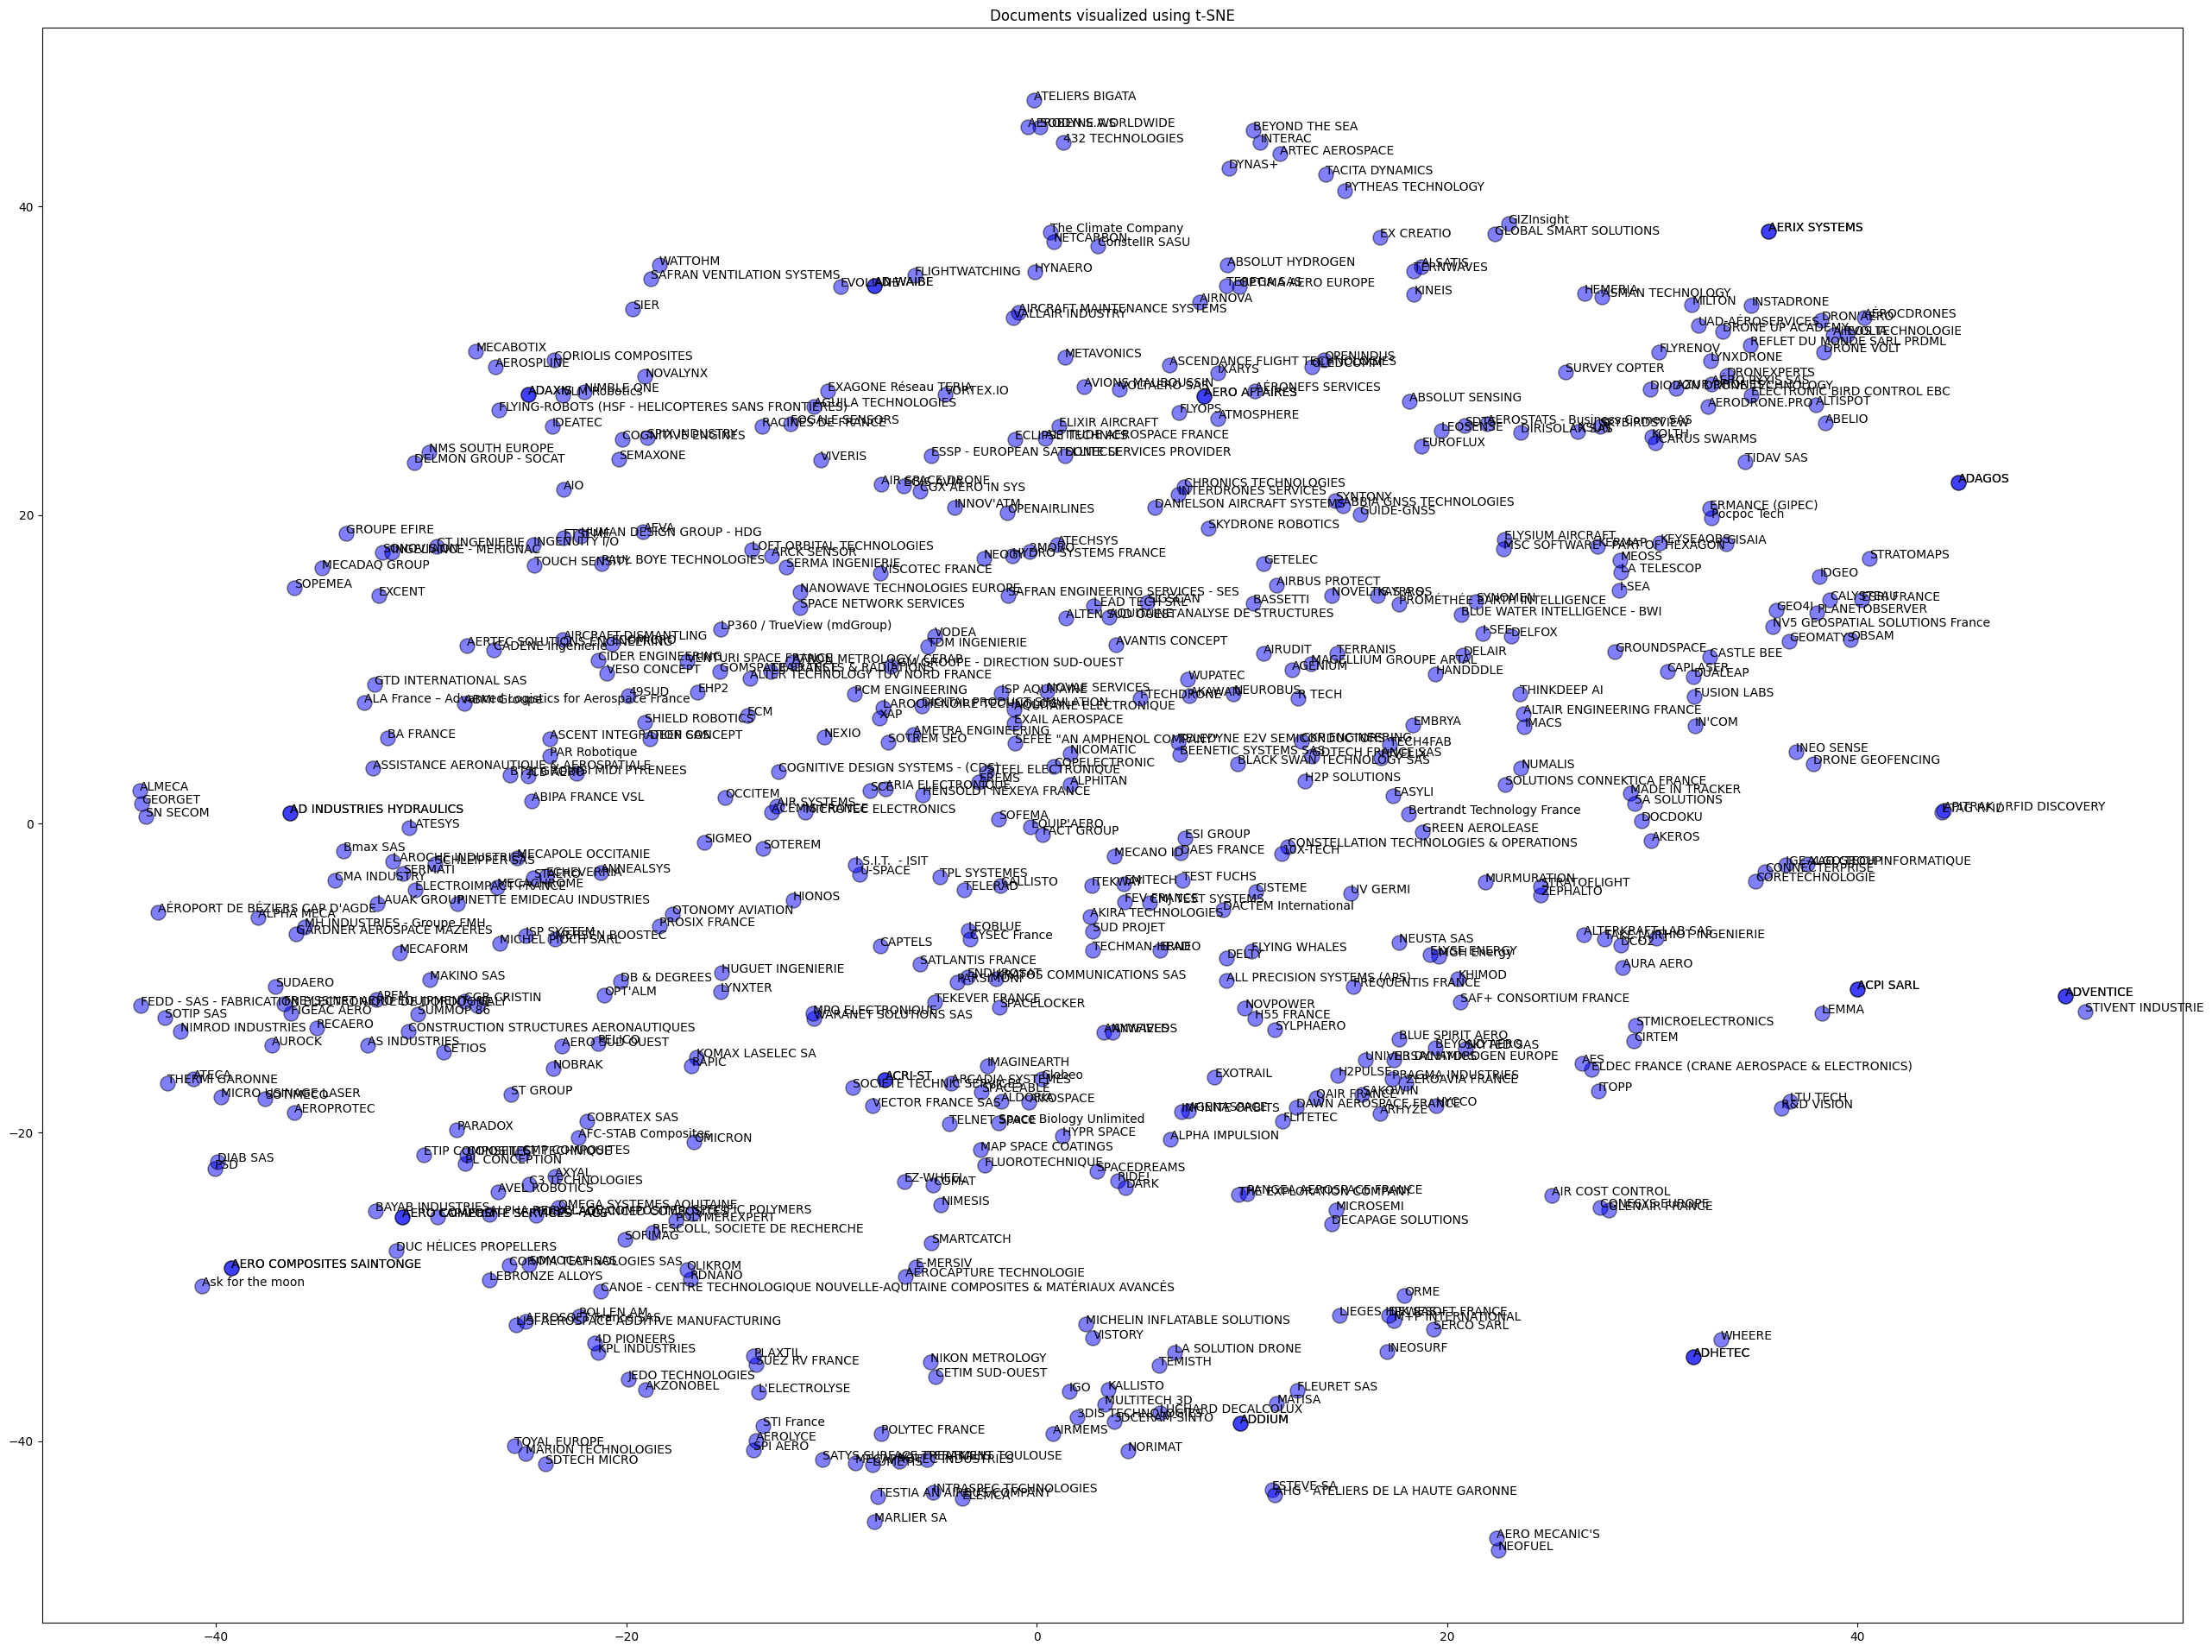

In [12]:
# Plot tSNE embeddings function
def plot_tsne(similarity_matrix, filenames):
    perplexity = min(10, len(filenames) - 1)  # Perplexity must be lower than the number of items
    distance_matrix = 1 - similarity_matrix
    distance_matrix[distance_matrix < 0] = 0  # We do not want to have negative values
    tsne = TSNE(n_components=2, metric="precomputed", perplexity=perplexity, init="random", random_state=42)
    embedding = tsne.fit_transform(distance_matrix)

    plt.figure(figsize=(32, 24))
    plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', edgecolors='k', s=150, alpha=0.5)
    for i, filename in enumerate(filenames):
        plt.annotate(filename, (embedding[i, 0], embedding[i, 1]))
    plt.title("Documents visualized using t-SNE")
    plt.show()
    
plot_tsne(similarity_matrix, names)


# Clustering
This section should contain:

List of clustering methods considered
Estimation of the number of clusters (methods, results, discussion)
Comparison of (the results of) clustering methods on the selected dataset


## Hierarchical clustering

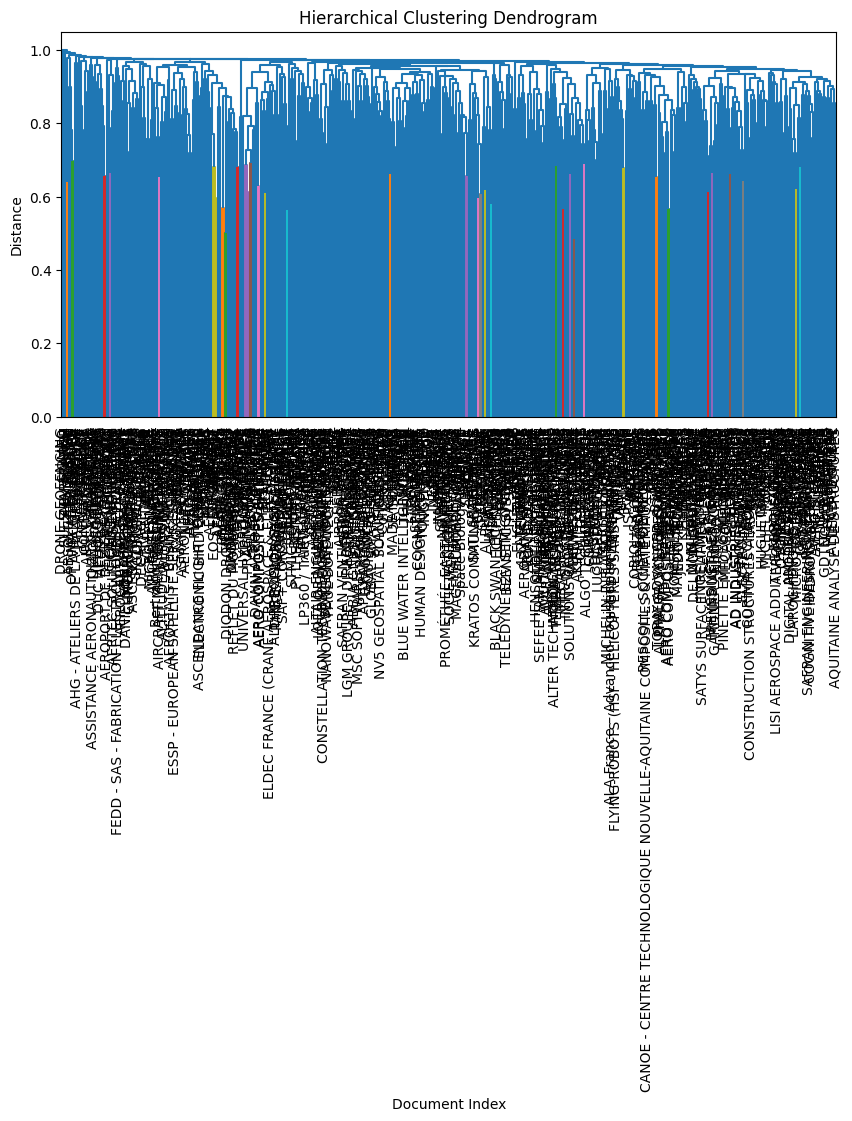

In [13]:
def plot_dendrogram(dtm_df:pd.DataFrame):
    
    # Perform the first part -- hierarchical clustering
    linkage_matrix = sch.linkage(dtm_df, metric='cosine', method='average')

    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    sch.dendrogram(linkage_matrix, labels=dtm_df.index, leaf_font_size=10)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Document Index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(tfidf_df)


## Non-hierarchical clustering

### k-Means

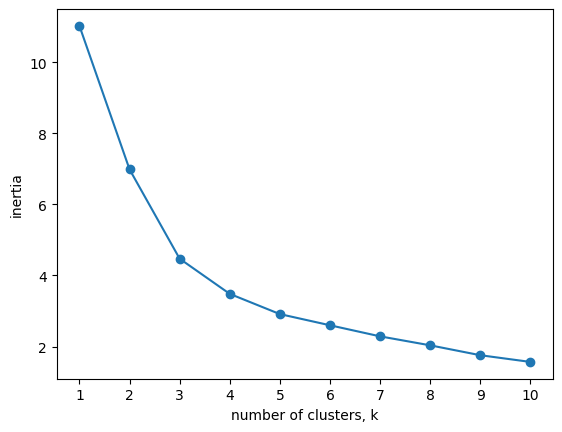

In [14]:
def plot_inertia(ks:list[int], kmeans_data):
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(X=kmeans_data)
        inertias.append(model.inertia_)
        
    plt.plot(ks, inertias, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

k_list = list(range(1,11))
plot_inertia(ks= k_list, kmeans_data=reduced_data)

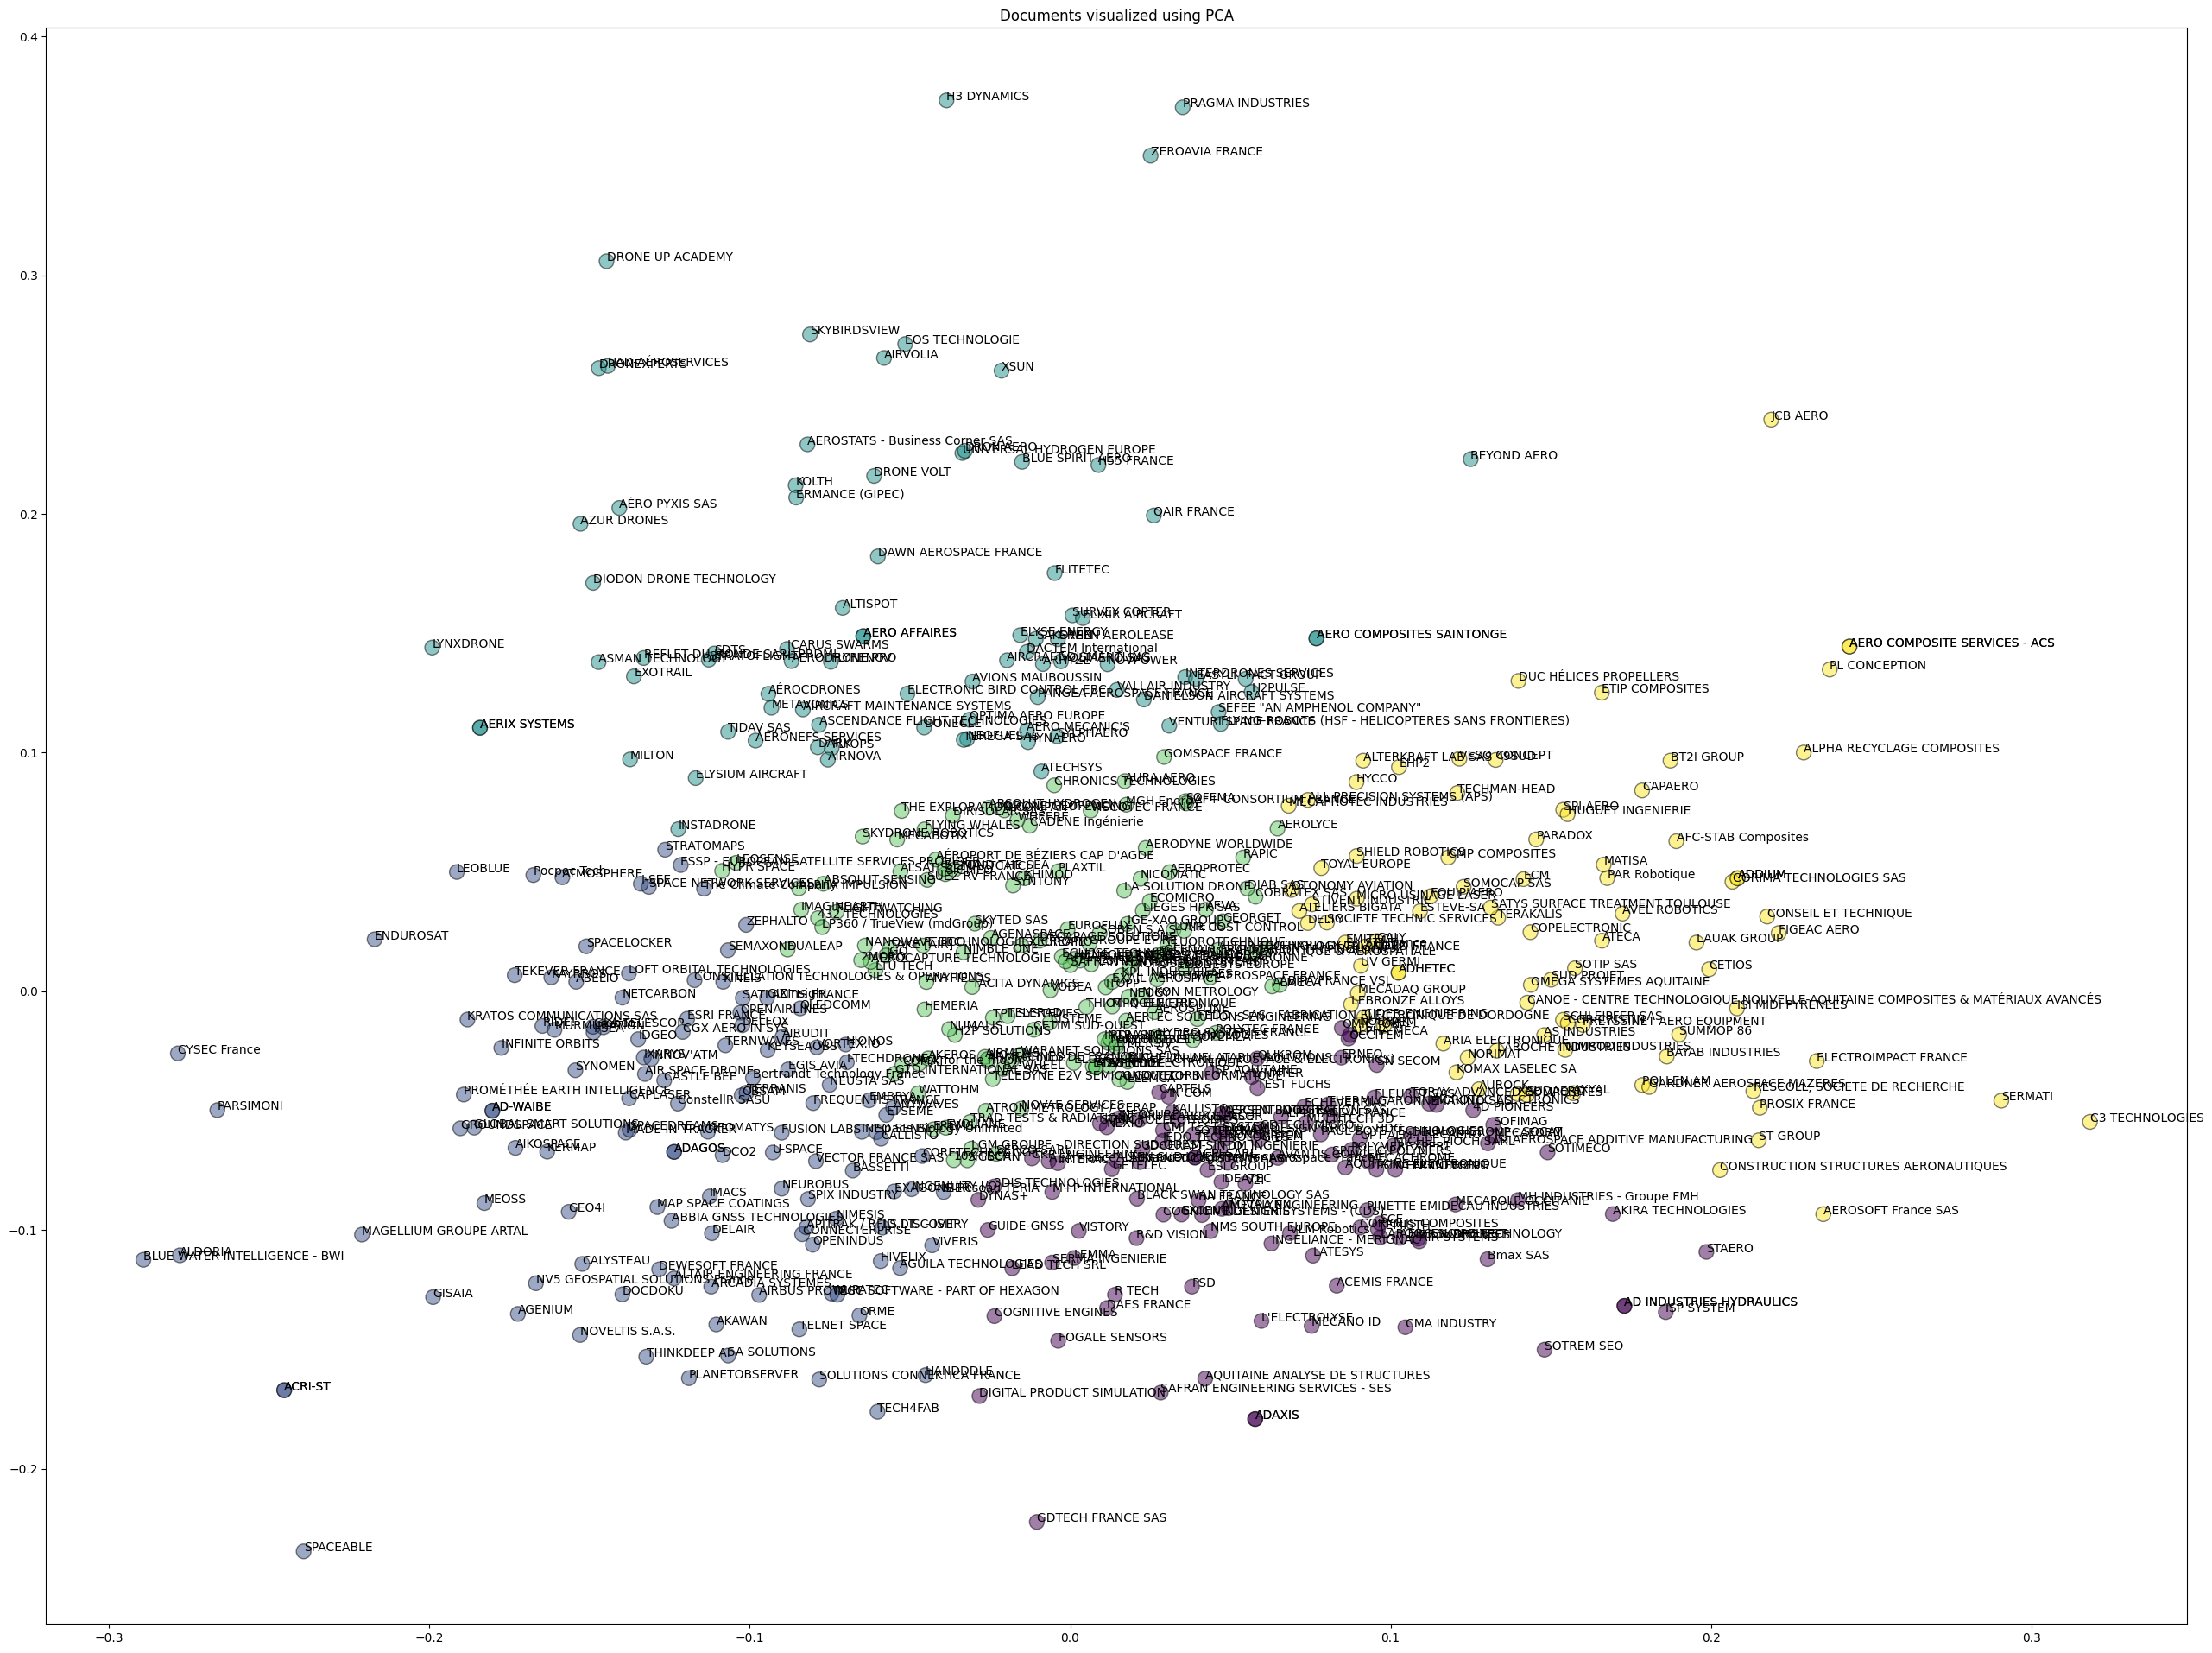

In [15]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(32, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, edgecolors='k', s=150, alpha=0.5)
for i, filename in enumerate(names):
    plt.annotate(filename, (reduced_data[i, 0], reduced_data[i, 1]))
plt.title("Documents visualized using PCA")
plt.show()

In [38]:
df_aero["cluster"] = clusters
df_aero.sample()

samples = df_aero.groupby('cluster', group_keys=False).apply(lambda x: x.sample(1),  include_groups=False)
for sample in samples[["Name","EN"]].values:
    print(sample)

['OMICRON'
 'Since 1982 OMICRON has specialised in the development and manufacture (under contract) of electronic equipment for the most demanding and innovative sectors. From the design department to the serial life of the product, we accompany you in the design, industrialisation, manufacturing, testing, commissioning and technical support of your products. Visit our website www.omicron.fr or contact us to discuss your projects.\n']
['AGUILA TECHNOLOGIES'
 'AGUILA Technologies is an independent high-tech company, specializing in iot solutions (hardware cloud, App…) including in particular geolocation. Recognized for its quality work and expertise, the company has unique expertise in all steps of producing technological products. Today, more than 75 000 products exploit a technology developed by AGUILA. Our company has completed projects in several high-growth areas such as Intelligent Transportation Systems (ITS) and Logistics Environment, nature and precision agriculture.']
['AIRVOL


# Cluster Descriptions
The clusters (at least important part of them) should be described.

This section should contain:

Description of the selected approach
Examples of the descriptions obtained



# Visualization
This section should contain:

At least one visualization related to clustering



# Analytical Report
The entire work should be ended by the final analytical report of findings on the selected dataset. It should point out your main results, their justifications, hypotheses, conclusions, outliers, ...